# FITNESS CLUB

Some of the well-known benefits of exercise are controls weight, combats health diseases, improves emotional stability.
Increased participation in fitness and wellness activities can improve their overall health and well-being

Importing the libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

Reading the csv file

In [39]:
sa=pd.read_csv("fitness_class_2212.csv")

In [40]:
sa.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


COLUMNS

booking_id:The unique identifier of the booking.                                                                                   
months_as_member:   The number of months as this fitness club member, minimum 1 month.

weight: weight of the person.

days_before:The number of days before the class the member registered.

day_of_week: Day of the week.

time: AM or PM.

category: Different categories in fitness club.

attended: 0 for not attended and 1 for attended.


    

INF0: information about the dataframe

In [41]:
sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


DESCRIBE:Description of the data in the dataframe. 

In [42]:
sa.describe()

,booking_id,months_as_member,weight,attended
count,1500.000000,1500.000000,1480.000000,1500.000000
mean,750.500000,15.628667,82.610378,0.302667
std,433.157015,12.926543,12.765859,0.459565
min,1.000000,1.000000,55.410000,0.000000
25%,375.750000,8.000000,73.490000,0.000000
50%,750.500000,12.000000,80.760000,0.000000
75%,1125.250000,19.000000,89.520000,1.000000
max,1500.000000,148.000000,170.520000,1.000000


Checking for null values: True for null values and otherwise False

In [43]:
sa.isnull()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1495,False,False,False,False,False,False,False,False
1496,False,False,False,False,False,False,False,False
1497,False,False,False,False,False,False,False,False
1498,False,False,False,False,False,False,False,False


Null values sum of each column.

In [44]:
sa.isnull().sum()

booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

We can observe 20 null values in the column 'weight'. So instead for dropping that column, just replacing those null values with the mean of the weight.

In [45]:
sa['weight']= sa['weight'].fillna(sa['weight'].mean())

In [46]:
sa.isnull().sum()

booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64

The unnecessory column is 'booking_id',so dropping the booking_id column.

In [47]:
column_to_drop = 'booking_id'
sa = sa.drop(column_to_drop, axis=1)

Mapping the days of week to integer value

In [48]:
sa['day_of_week'] = sa['day_of_week'].str[:3]

day_mapping = {
    'Mon': 1,
    'Tue': 2,
    'Wed': 3,
    'Thu': 4,
    'Fri': 5,
    'Sat': 6,
    'Sun': 7
}

sa['day_of_week'] = sa['day_of_week'].map(day_mapping)

In [49]:
sa['days_before'] = sa['days_before'].astype(str)
sa['days_before'] = sa['days_before'].str.replace(' days', '').astype(int)


Checking and dropping off the duplicates 

In [50]:
sa.drop_duplicates(inplace=True)
sa.duplicated().sum()

0

dtypes: data type of each column

In [51]:
sa.dtypes

months_as_member      int64
weight              float64
days_before           int32
day_of_week           int64
time                 object
category             object
attended              int64
dtype: object

In [52]:
sa.to_csv('cleaned_data.csv', index=False)


In [53]:
sa.head()

,months_as_member,weight,days_before,day_of_week,time,category,attended
0,17,79.56,8,3,PM,Strength,0
1,10,79.01,2,1,AM,HIIT,0
2,16,74.53,14,7,AM,Strength,0
3,5,86.12,10,5,AM,Cycling,0
4,15,69.29,8,4,AM,HIIT,0


In [54]:
print(sa.shape)

(1499, 7)


In [55]:
print(sa.size)

10493


In [56]:
print(sa.columns)

Index(['months_as_member', 'weight', 'days_before', 'day_of_week', 'time',
       'category', 'attended'],
      dtype='object')


# Data Visualisation

In [57]:
sa["category"].unique()

array(['Strength', 'HIIT', 'Cycling', 'Yoga', '-', 'Aqua'], dtype=object)

Text(0.5, 1.0, 'category')

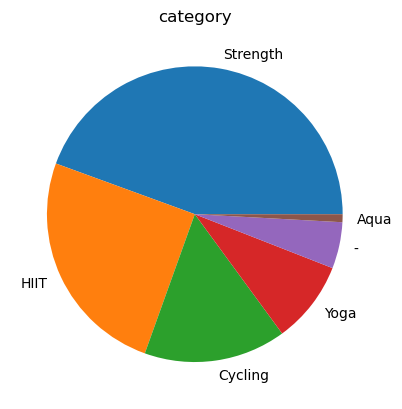

In [58]:
label=['Strength', 'HIIT', 'Cycling', 'Yoga', '-', 'Aqua']
plt.pie(sa["category"].value_counts(),labels=label)
plt.title('category')

In [59]:
sa["time"].unique()

array(['PM', 'AM'], dtype=object)

Text(0.5, 1.0, 'time')

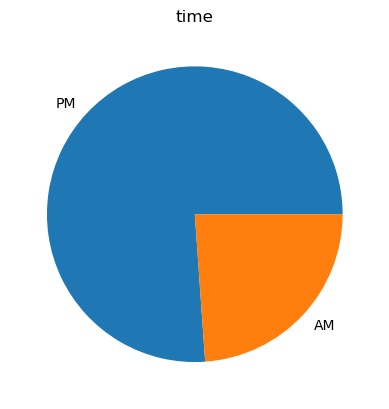

In [60]:
label=['PM', 'AM']
plt.pie(sa["time"].value_counts(),labels=label)
plt.title('time')

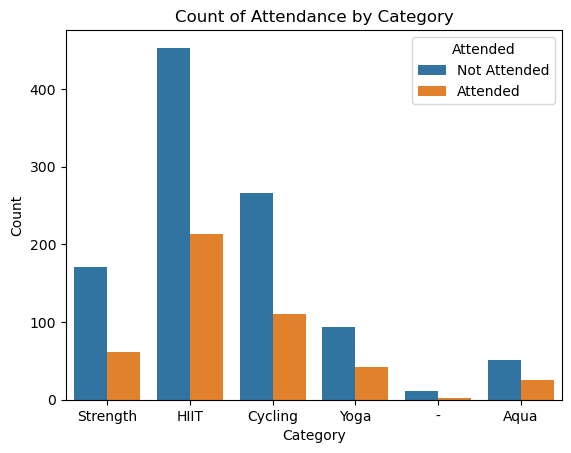

In [61]:
ax = sns.countplot(data=sa, x='category', hue='attended')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Attendance by Category')
plt.legend(title='Attended', labels=['Not Attended', 'Attended'])
plt.show()

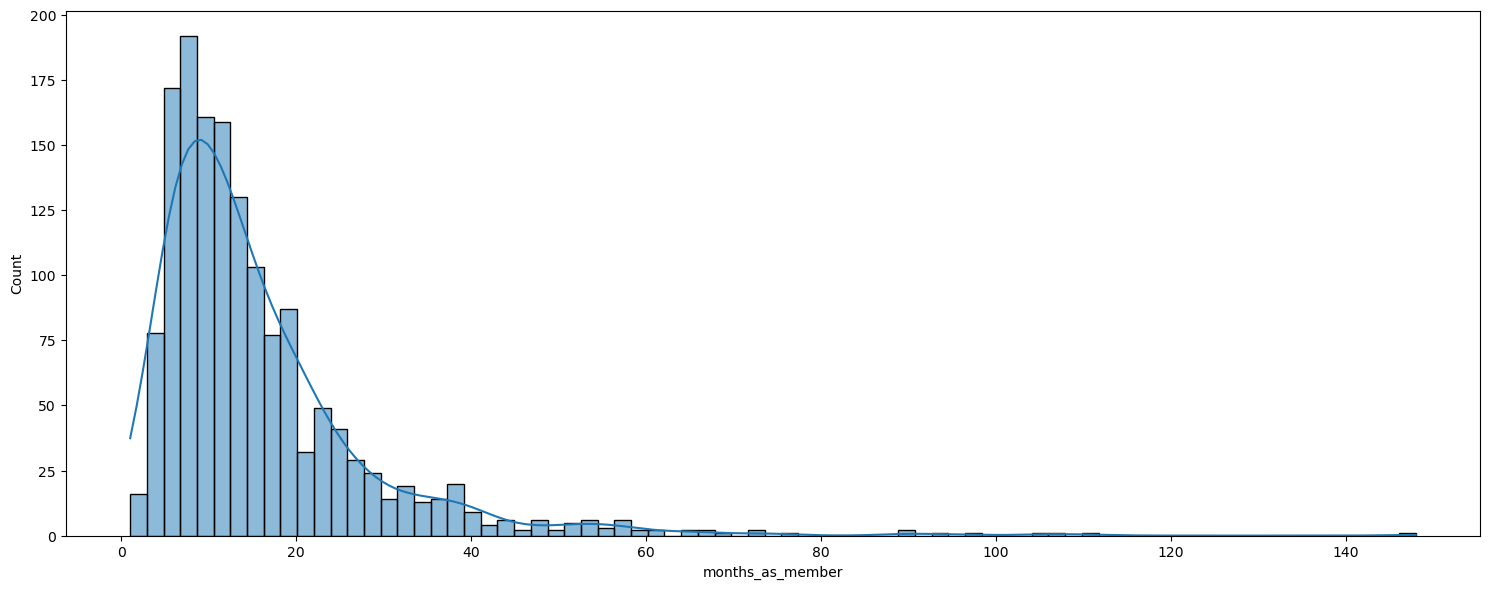

In [62]:
plt.figure(figsize=(15, 6))
sns.histplot(data=sa, x='months_as_member',kde=True)
plt.tight_layout()

<Axes: xlabel='weight', ylabel='category'>

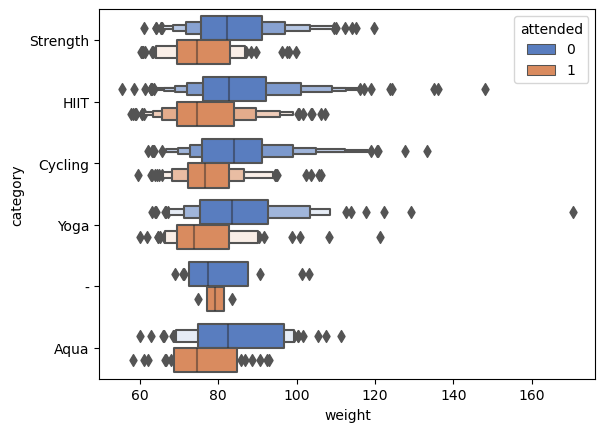

In [63]:
sns.boxenplot(data=sa,x="weight",y="category",hue="attended",palette="muted")

<Axes: xlabel='weight', ylabel='time'>

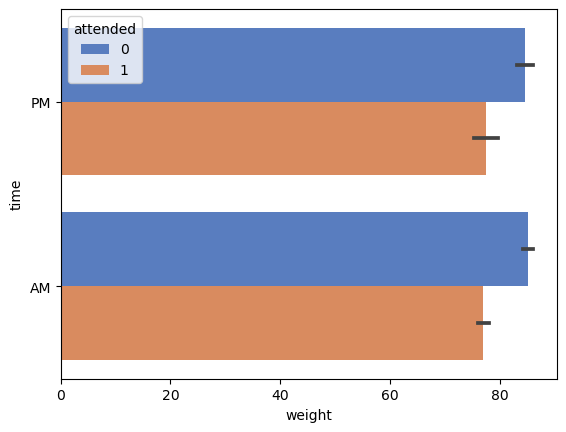

In [64]:
sns.barplot(data=sa,x="weight",y="time",hue="attended",palette="muted")

<Axes: xlabel='weight', ylabel='time'>

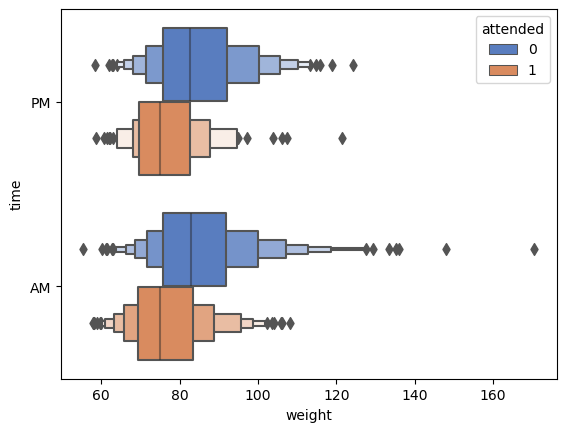

In [65]:
sns.boxenplot(data=sa,x="weight",y="time",hue="attended",palette="muted")

CORRELATION: It is a common statistical tool used to understand the relationships between different variables in a dataset.

In [66]:
corr_mat=sa.corr()

In [67]:
corr_mat

,months_as_member,weight,days_before,day_of_week,attended
months_as_member,1.000000,-0.465623,0.002763,0.008617,0.485436
weight,-0.465623,1.000000,0.001703,-0.001704,-0.283562
days_before,0.002763,0.001703,1.000000,0.980150,0.023716
day_of_week,0.008617,-0.001704,0.980150,1.000000,0.034624
attended,0.485436,-0.283562,0.023716,0.034624,1.000000


Heatmaps are often used to visualize the correlation between variables in a correlation matrix.

<Axes: >

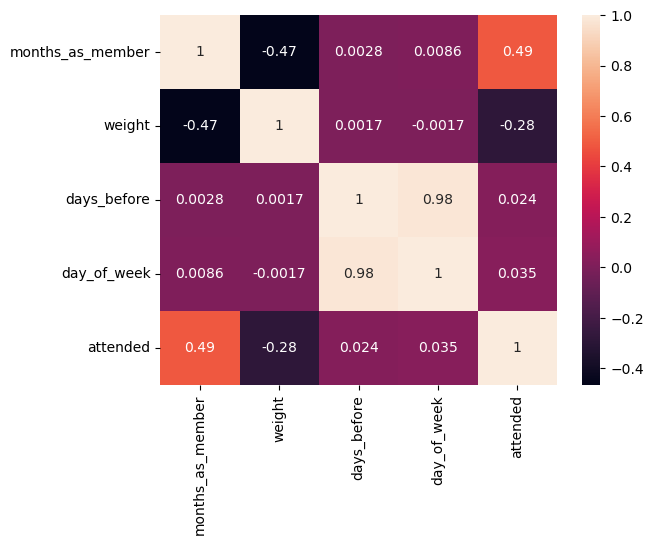

In [68]:
sns.heatmap(corr_mat,annot=True)

Dividing into features and target for applying to the ML algorithms.

In [69]:
X = sa.iloc[:, :4] 
y = sa.iloc[:, 6]

In [70]:
X

,months_as_member,weight,days_before,day_of_week
0,17,79.56,8,3
1,10,79.01,2,1
2,16,74.53,14,7
3,5,86.12,10,5
4,15,69.29,8,4
...,...,...,...,...
1495,21,79.51,10,5
1496,29,89.55,2,1
1497,9,87.38,4,2
1498,34,68.64,14,7


In [71]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1495    0
1496    0
1497    0
1498    0
1499    1
Name: attended, Length: 1499, dtype: int64

Importing train test split,applying with test_size 30%

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state= 42)

In [73]:
X_test

,months_as_member,weight,days_before,day_of_week
1116,15,65.47,6,3
1396,16,86.73,8,4
422,13,67.26,10,5
413,7,86.70,12,6
451,5,135.18,8,4
...,...,...,...,...
1083,12,60.28,2,1
990,19,72.10,5,2
650,8,78.59,3,2
1187,13,73.16,10,5


The main objective is to predict whether the person has attended or not attended based on the feature values

# 1.LogisticRegression

 Logistic Regression is used to predict the categorical dependent variable using a given set of independent variables.

In [74]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

Fitting the model and predicting the model

In [75]:
prd=model.predict(X_test)

In [76]:
prd

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

Calcualting the accuracy_score

In [77]:
from sklearn.metrics import accuracy_score

In [78]:
acc1 = accuracy_score(y_test, prd)
acc1

0.7466666666666667

The accuracy for logistic regression model is 74.66

# RandomForestClassifier

Random forest is a commonly-used machine learning algorithm, which combines the output of multiple decision trees to reach a single result.

In [79]:
from sklearn.ensemble import RandomForestClassifier

rnd=RandomForestClassifier(n_estimators=100)
rnd

RandomForestClassifier()

Model fitting , predicting and displaying the accuracy_acore and confusion matrix

In [80]:
rnd.fit(X_train,y_train)

RandomForestClassifier()

In [81]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [82]:
prd=rnd.predict(X_test)
prd

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [83]:
acc2=accuracy_score(y_test,prd)
acc2

0.7288888888888889

The accuracy for random forest classifier is 72.88

In [84]:
cm=confusion_matrix(y_test,prd)
cm

array([[256,  36],
       [ 86,  72]], dtype=int64)

# DecisionTree

A decision tree algorithm is a machine learning algorithm that uses a decision tree to make predictions. It follows a tree-like model of decisions and their possible consequences. The algorithm works by recursively splitting the data into subsets based on the most significant feature at each node of the tree.

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [86]:
cla=DecisionTreeClassifier()

In [87]:
cla.fit(X_train,y_train)

DecisionTreeClassifier()

In [88]:
prd=cla.predict(X_test)
prd

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [89]:
from sklearn import metrics
acc3=metrics.accuracy_score(y_test,prd)
acc3

0.6755555555555556

In [90]:
reg=DecisionTreeRegressor()

In [91]:
reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [92]:
prd4=reg.predict(X_test)
prd4

array([1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [93]:
acc=metrics.accuracy_score(y_test,prd4)
acc

0.6844444444444444

For decision tree classifier , the accuracy is 67.55 and for decision tree regressor, the accuracy is 68.44

# Back Propagation

Backpropagation, or backward propagation of errors, is an algorithm that is designed to test for errors working back from output nodes to input nodes.

In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [95]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [96]:
nm=MLPClassifier(hidden_layer_sizes=(10,),max_iter=300,random_state=42)

In [97]:
nm.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(10,), max_iter=300, random_state=42)

In [98]:
nm.score(X_test,y_test)

0.7466666666666667

In [99]:
train_ac=[]
check_ac=[]

In [100]:
for epoch in range(1,101):
    nm.fit(X_train,y_train)
    train_ac.append(nm.score(X_train,y_train))
    check_ac.append(nm.score(X_test,y_test))

In [101]:
acc4=nm.score(X_test,y_test)
acc4

0.7466666666666667

The accuracy for back propagation algorithm is 74.66

# Naive Bayes

It is a classification technique based on Bayes' Theorem with an independence assumption among predictors.

In [102]:
from sklearn.naive_bayes import GaussianNB


In [103]:
sc=StandardScaler()
x_train=sc.fit_transform(X_train)
x_test=sc.fit_transform(X_test)

In [104]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [105]:
prd=model.predict(X_test)
prd

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [106]:
acc5=accuracy_score(y_test,prd)
acc5

0.7355555555555555

In [107]:
from sklearn.metrics import classification_report

In [108]:
p=classification_report(y_test,prd)

In [109]:
print("p ",p)

p                precision    recall  f1-score   support

           0       0.72      0.96      0.82       292
           1       0.80      0.33      0.47       158

    accuracy                           0.74       450
   macro avg       0.76      0.64      0.65       450
weighted avg       0.75      0.74      0.70       450



The accuracy of naive bayes algorithm is 73.55

# KNN

The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

In [110]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score


In [111]:
b_k=None
b_a=0

In [112]:
for k in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x_train,y_train,cv=9)
    
    print(scores)
    m_a=np.mean(scores)
    if m_a>b_a:
        b_a=m_a
        b_k=k

[0.71794872 0.71794872 0.70940171 0.70940171 0.76923077 0.62931034
 0.72413793 0.70689655 0.73275862]
[0.75213675 0.76068376 0.74358974 0.74358974 0.79487179 0.68965517
 0.73275862 0.75862069 0.77586207]
[0.72649573 0.75213675 0.73504274 0.73504274 0.75213675 0.63793103
 0.71551724 0.72413793 0.71551724]
[0.74358974 0.76923077 0.74358974 0.76068376 0.77777778 0.68965517
 0.74137931 0.75       0.75      ]
[0.72649573 0.76068376 0.76923077 0.79487179 0.81196581 0.65517241
 0.73275862 0.74137931 0.74137931]
[0.72649573 0.78632479 0.76923077 0.76923077 0.8034188  0.71551724
 0.75       0.75       0.76724138]
[0.76068376 0.77777778 0.79487179 0.78632479 0.83760684 0.70689655
 0.75       0.73275862 0.76724138]
[0.74358974 0.77777778 0.81196581 0.78632479 0.82051282 0.72413793
 0.77586207 0.74137931 0.75862069]
[0.78632479 0.76923077 0.82051282 0.81196581 0.82905983 0.70689655
 0.78448276 0.76724138 0.76724138]


In [113]:
bknn=KNeighborsClassifier(n_neighbors=b_k)

In [114]:
bknn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [115]:
X_without_feature_names = X.values if hasattr(X, 'values') else X  
y = y.values if hasattr(y, 'values') else y

In [116]:
prd=bknn.predict(X_test)
prd

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,

In [117]:
acc6=accuracy_score(y_test,prd)
acc6

0.7333333333333333

In [118]:
b_k

9

The accuracy for KNN algorithm is 73.33

# SVM

SVM is to find the hyperplane that best separates different classes in the feature space. 

In [119]:
from sklearn.model_selection import train_test_split, GridSearchCV


In [120]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [121]:
from sklearn.svm import SVC
classifier = SVC(kernel="rbf", random_state=0, degree =5)
classifier.fit(X_train, y_train)

SVC(degree=5, random_state=0)

In [122]:
y_preds = classifier.predict(X_test)
y_preds

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [123]:
cm =confusion_matrix(y_test, y_preds)
print(cm)

acc7=accuracy_score(y_test, y_preds)
print(acc7)

[[282  10]
 [105  53]]
0.7444444444444445


The accuracy for SVM algorithm is 74.44

# Plotting the accuracies of all algorithms

In [124]:
x=['Logistic','Random_forest_classifier','Decision_tree','Back_propagation','naive_bayes','KNN','SVM']
y=[acc1,acc2,acc3,acc4,acc5,acc6,acc7]

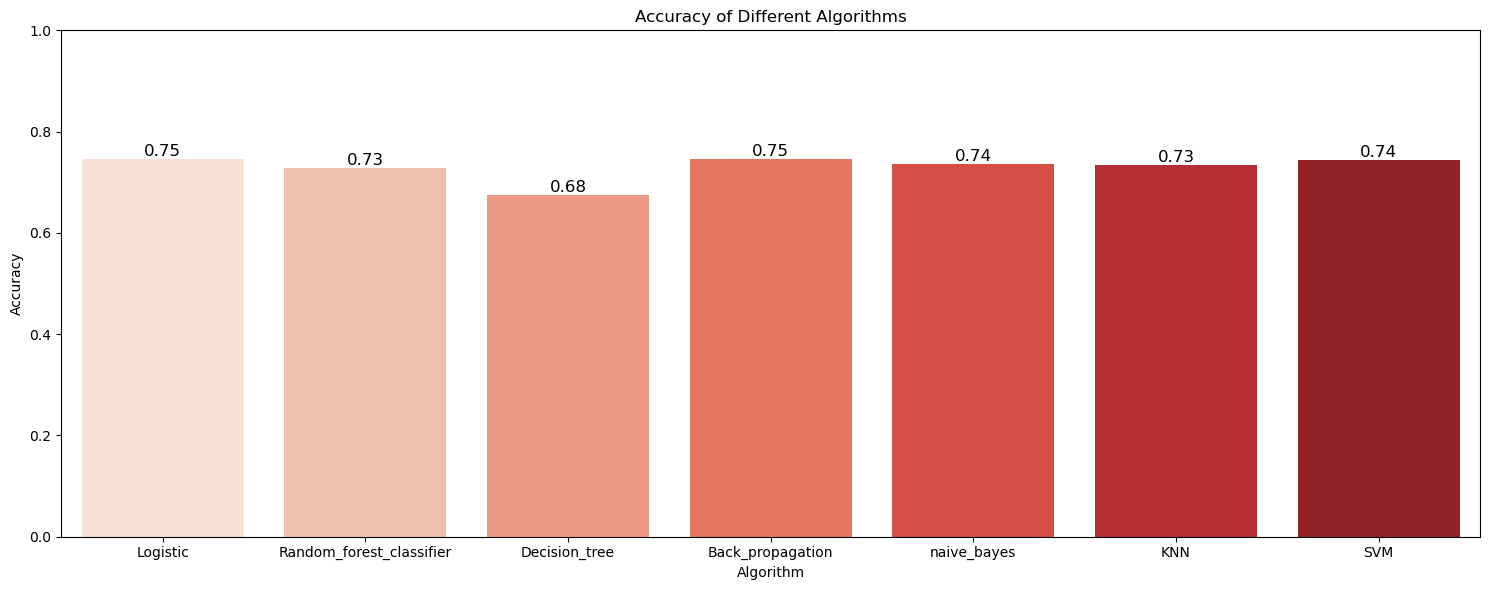

In [126]:
plt.figure(figsize=(15, 6))  
sns.barplot(x=x, y=y, palette="Reds")
for i, score in enumerate(y):
    plt.text(i, score, f"{score:.2f}", ha="center", va="bottom", fontsize=12)
plt.title("Accuracy of Different Algorithms")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.ylim(0, 1) 
plt.tight_layout()
plt.show()

After displaying all the accuaracies in one plot, we can observe that both logistic regression and back propagation algorithms has the accuracies of 75%, so further usuing these algorithms, lets us take the user input and predict the target value.

# Taking User Input

In [127]:
import joblib as jb

In [128]:
jb.dump(nm,'fitness_club')

['fitness_club']

In [129]:
model = jb.load("fitness_club")

In [130]:
sa.columns

Index(['months_as_member', 'weight', 'days_before', 'day_of_week', 'time',
       'category', 'attended'],
      dtype='object')

In [131]:
sa.head()

,months_as_member,weight,days_before,day_of_week,time,category,attended
0,17,79.56,8,3,PM,Strength,0
1,10,79.01,2,1,AM,HIIT,0
2,16,74.53,14,7,AM,Strength,0
3,5,86.12,10,5,AM,Cycling,0
4,15,69.29,8,4,AM,HIIT,0


In [132]:
X

,months_as_member,weight,days_before,day_of_week
0,17,79.56,8,3
1,10,79.01,2,1
2,16,74.53,14,7
3,5,86.12,10,5
4,15,69.29,8,4
...,...,...,...,...
1495,21,79.51,10,5
1496,29,89.55,2,1
1497,9,87.38,4,2
1498,34,68.64,14,7


In [133]:
sa

,months_as_member,weight,days_before,day_of_week,time,category,attended
0,17,79.56,8,3,PM,Strength,0
1,10,79.01,2,1,AM,HIIT,0
2,16,74.53,14,7,AM,Strength,0
3,5,86.12,10,5,AM,Cycling,0
4,15,69.29,8,4,AM,HIIT,0
...,...,...,...,...,...,...,...
1495,21,79.51,10,5,AM,HIIT,0
1496,29,89.55,2,1,AM,Strength,0
1497,9,87.38,4,2,AM,HIIT,0
1498,34,68.64,14,7,AM,Aqua,0


In [134]:
import pandas as pd
df = pd.DataFrame({
    'months_as_member':34,
    'weight':68.64,
    'days_before':14,
    'day_of_week':7,
},index=[0])

In [135]:
df

,months_as_member,weight,days_before,day_of_week
0,34,68.64,14,7


In [136]:
result = model.predict(df)

In [137]:
result

array([1], dtype=int64)

In [138]:
a=int(input("enter month as member"))
b=float(input("weight"))
c=int(input("days before"))
d=int(input("day of week"))
prediction=model.predict([[a,b,c,d]])
print(prediction)

enter month as member34
weight68.64
days before14
day of week7
[1]


In [139]:
if prediction==1:
    print("Attended")
else:
    print("Not Attended")

Attended


CONCLUSION:
    After performing all the above algorithms, Logistic Regression and Back Propagation algorithm has given the accuracy of 75%.
    